## Importing Dataset

In [26]:
!pip install ucimlrepo

In [123]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
from sklearn.feature_selection import SelectKBest, f_classif
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
%matplotlib inline

In [ ]:
# Get Data and metadata
def get_data(uci_id = 45):
    heart_disease = fetch_ucirepo(id=45)
    metadata = heart_disease.metadata
    for key, value in metadata.items():
        if isinstance(value, dict):
            print(f"Metadata for {key}:")
            for sub_key, sub_value in value.items():
                print(f"{sub_key}: {sub_value}")
        else:
            print(f"{key}: {value}")
    return heart_disease
heart_data = get_data()

In [17]:
X = heart_data.data.features
y = heart_data.data.targets
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
dtypes: float64(3), int64(10)
memory usage: 30.9 KB


In [18]:
print(heart_data.variables)

        name     role         type demographic  \
0        age  Feature      Integer         Age   
1        sex  Feature  Categorical         Sex   
2         cp  Feature  Categorical        None   
3   trestbps  Feature      Integer        None   
4       chol  Feature      Integer        None   
5        fbs  Feature  Categorical        None   
6    restecg  Feature  Categorical        None   
7    thalach  Feature      Integer        None   
8      exang  Feature  Categorical        None   
9    oldpeak  Feature      Integer        None   
10     slope  Feature  Categorical        None   
11        ca  Feature      Integer        None   
12      thal  Feature  Categorical        None   
13       num   Target      Integer        None   

                                          description  units missing_values  
0                                                None  years             no  
1                                                None   None             no  
2              

In [23]:
def transform_data(X, y):
    imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
    X = pd.DataFrame(imp.fit_transform(X), columns = X.columns).astype(X.dtypes.to_dict())
    print(X.info)
    return X, y
X,y = transform_data(X, y)
y

<bound method DataFrame.info of      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   1       145   233    1        2      150      0      2.3   
1     67    1   4       160   286    0        2      108      1      1.5   
2     67    1   4       120   229    0        2      129      1      2.6   
3     37    1   3       130   250    0        0      187      0      3.5   
4     41    0   2       130   204    0        2      172      0      1.4   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   45    1   1       110   264    0        0      132      0      1.2   
299   68    1   4       144   193    1        0      141      0      3.4   
300   57    1   4       130   131    0        0      115      1      1.2   
301   57    0   2       130   236    0        2      174      0      0.0   
302   38    1   3       138   175    0        0      173      0      0.0   

     slope   ca  thal  
0        3  0.0   6.0  
1      

num
0      0
1      2
2      1
3      0
4      0
..   ...
298    1
299    2
300    3
301    1
302    0

[303 rows x 1 columns]

In [24]:
X

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   1       145   233    1        2      150      0      2.3   
1     67    1   4       160   286    0        2      108      1      1.5   
2     67    1   4       120   229    0        2      129      1      2.6   
3     37    1   3       130   250    0        0      187      0      3.5   
4     41    0   2       130   204    0        2      172      0      1.4   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   45    1   1       110   264    0        0      132      0      1.2   
299   68    1   4       144   193    1        0      141      0      3.4   
300   57    1   4       130   131    0        0      115      1      1.2   
301   57    0   2       130   236    0        2      174      0      0.0   
302   38    1   3       138   175    0        0      173      0      0.0   

     slope   ca  thal  
0        3  0.0   6.0  
1        2  3.0   3.0  
2        2  2.0   7.0  
3        3  0.0   3.0  
4        1  0.0   3.0  
..     ...  ...   ...  
298      2  0.0   7.0  
299      2  2.0   7.0  
300      2  1.0   7.0  
301      2  1.0   3.0  
302      1  0.0   3.0  

[303 rows x 13 columns]

## EDA

In [43]:
df = pd.concat([X,y],axis = 1)
df

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   1       145   233    1        2      150      0      2.3   
1     67    1   4       160   286    0        2      108      1      1.5   
2     67    1   4       120   229    0        2      129      1      2.6   
3     37    1   3       130   250    0        0      187      0      3.5   
4     41    0   2       130   204    0        2      172      0      1.4   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   45    1   1       110   264    0        0      132      0      1.2   
299   68    1   4       144   193    1        0      141      0      3.4   
300   57    1   4       130   131    0        0      115      1      1.2   
301   57    0   2       130   236    0        2      174      0      0.0   
302   38    1   3       138   175    0        0      173      0      0.0   

     slope   ca  thal  num  
0        3  0.0   6.0    0  
1        2  3.0   3.0    2  
2        2  2.0   7.0    1  
3        3  0.0   3.0    0  
4        1  0.0   3.0    0  
..     ...  ...   ...  ...  
298      2  0.0   7.0    1  
299      2  2.0   7.0    2  
300      2  1.0   7.0    3  
301      2  1.0   3.0    1  
302      1  0.0   3.0    0  

[303 rows x 14 columns]

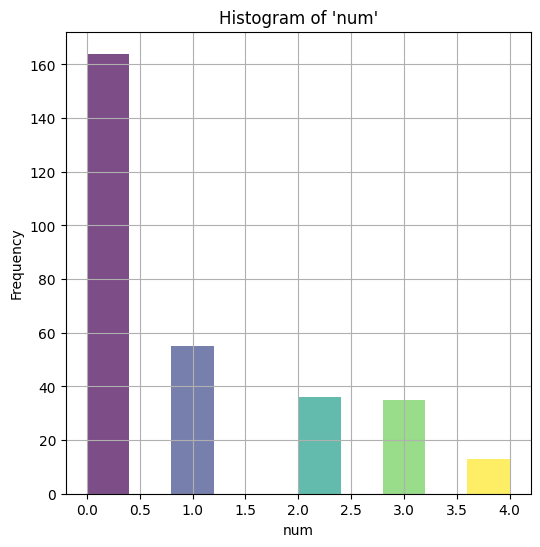

In [41]:
colors = plt.cm.viridis(np.linspace(0, 1, 10))

plt.figure(figsize=(6, 6))

n, bins, patches = plt.hist(df['num'], bins=10, alpha=0.7)

for i in range(len(patches)):
    patches[i].set_fc(colors[i])

plt.xlabel("num")
plt.ylabel("Frequency")
plt.title("Histogram of 'num'")
plt.grid(True)

plt.show()

In [64]:
def replace_values_above_threshold(df, column_name, y, threshold):
    df[column_name] = np.where(df[column_name] > threshold, 1, df[column_name])
    y['num'] = y['num'].apply(lambda x: 1 if x > 1 else x)
    return df,y

df,y = replace_values_above_threshold(df, 'num',y, 1)
df

<ipython-input-64-abc65c883621>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   1       145   233    1        2      150      0      2.3   
1     67    1   4       160   286    0        2      108      1      1.5   
2     67    1   4       120   229    0        2      129      1      2.6   
3     37    1   3       130   250    0        0      187      0      3.5   
4     41    0   2       130   204    0        2      172      0      1.4   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   45    1   1       110   264    0        0      132      0      1.2   
299   68    1   4       144   193    1        0      141      0      3.4   
300   57    1   4       130   131    0        0      115      1      1.2   
301   57    0   2       130   236    0        2      174      0      0.0   
302   38    1   3       138   175    0        0      173      0      0.0   

     slope   ca  thal  num  
0        3  0.0   6.0    0  
1        2  3.0   3.0    1  
2        2  2.0   7.0    1  
3        3  0.0   3.0    0  
4        1  0.0   3.0    0  
..     ...  ...   ...  ...  
298      2  0.0   7.0    1  
299      2  2.0   7.0    1  
300      2  1.0   7.0    1  
301      2  1.0   3.0    1  
302      1  0.0   3.0    0  

[303 rows x 14 columns]

In [65]:
y

num
0      0
1      1
2      1
3      0
4      0
..   ...
298    1
299    1
300    1
301    1
302    0

[303 rows x 1 columns]

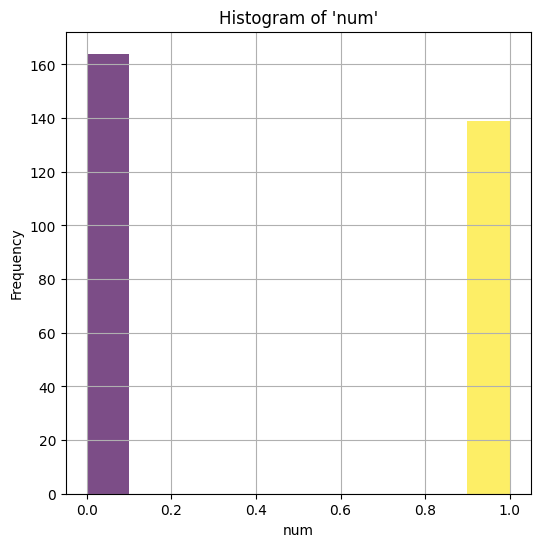

In [53]:
colors = plt.cm.viridis(np.linspace(0, 1, 10))

plt.figure(figsize=(6, 6))

n, bins, patches = plt.hist(df['num'], bins=10, alpha=0.7)
for i in range(len(patches)):
    patches[i].set_fc(colors[i])

plt.xlabel("num")
plt.ylabel("Frequency")
plt.title("Histogram of 'num'")
plt.grid(True)

plt.show()

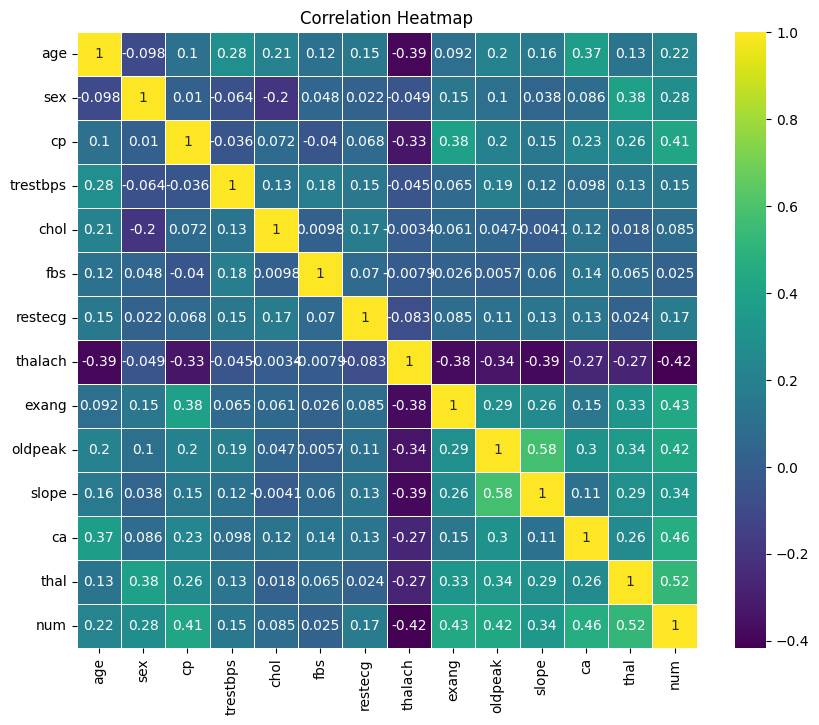

In [58]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

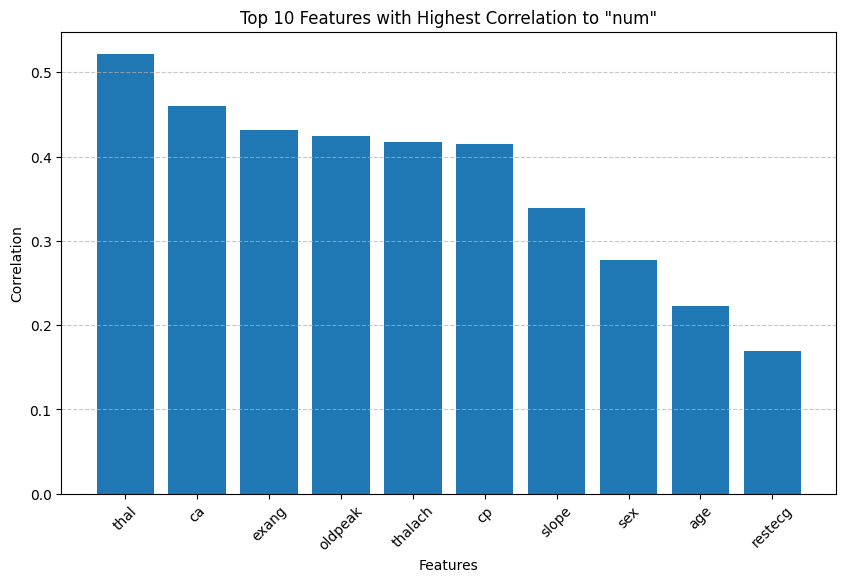

In [59]:
crr = df.corr()['num'].drop('num')

top_10_features = crr.abs().nlargest(10)

plt.figure(figsize=(10, 6))
plt.bar(top_10_features.index, top_10_features.values)
plt.title('Top 10 Features with Highest Correlation to "num"')
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


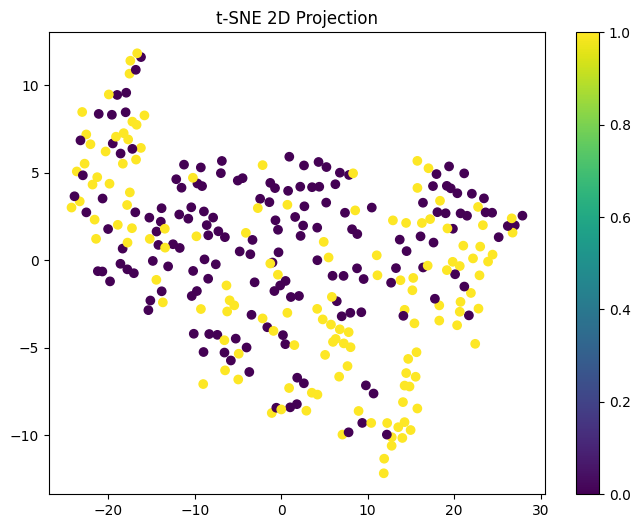

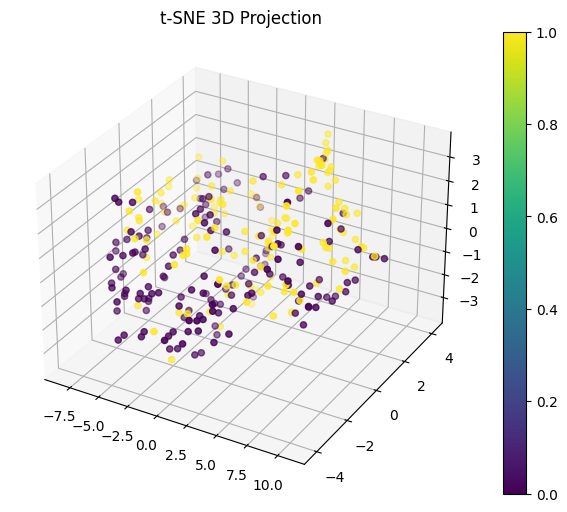

In [69]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_tsne(data, labels, n_components=2):
    tsne = TSNE(n_components=n_components, random_state=0)
    projections = tsne.fit_transform(data)

    if n_components == 2:

        plt.figure(figsize=(8, 6))
        plt.scatter(projections[:, 0], projections[:, 1], c=labels, cmap='viridis')
        plt.title('t-SNE 2D Projection')
        plt.colorbar()
        plt.show()
    elif n_components == 3:
        # 3D Scatter Plot
        fig = plt.figure(figsize=(8, 6))
        ax = fig.add_subplot(111, projection='3d')
        sc = ax.scatter(projections[:, 0], projections[:, 1], projections[:, 2], c=labels, cmap='viridis')
        ax.set_title('t-SNE 3D Projection')
        fig.colorbar(sc)
        plt.show()
    else:
        print("Invalid value for n_components. Please use 2 or 3.")

plot_tsne(data, labels, n_components=2)
plot_tsne(data, labels, n_components=3)

## The Models

In [76]:
def data_process(X, y, n_ftrs=6, split=0.2, random_state=42):

    feature_selector = SelectKBest(score_func=f_classif, k=n_ftrs)
    X_selected = feature_selector.fit_transform(X, y)
    selected_indices = feature_selector.get_support()
    selected_features = X.columns[selected_indices]
    X = X[selected_features]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split, random_state=random_state)

    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = data_process(X, y, n_ftrs=6, split=0.2)
X_train

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



cp  thalach  exang  oldpeak   ca  thal
132   2      202      0      0.0  0.0   3.0
202   3      173      0      0.2  1.0   7.0
196   1      131      0      0.1  1.0   3.0
75    3      151      0      0.8  0.0   3.0
176   4      147      0      0.1  3.0   7.0
..   ..      ...    ...      ...  ...   ...
188   2      195      0      0.0  1.0   7.0
71    4      163      0      0.2  2.0   7.0
106   4      162      1      0.0  1.0   7.0
270   4      138      1      1.9  1.0   7.0
102   4      159      0      0.0  1.0   3.0

[242 rows x 6 columns]

### Decision Trees

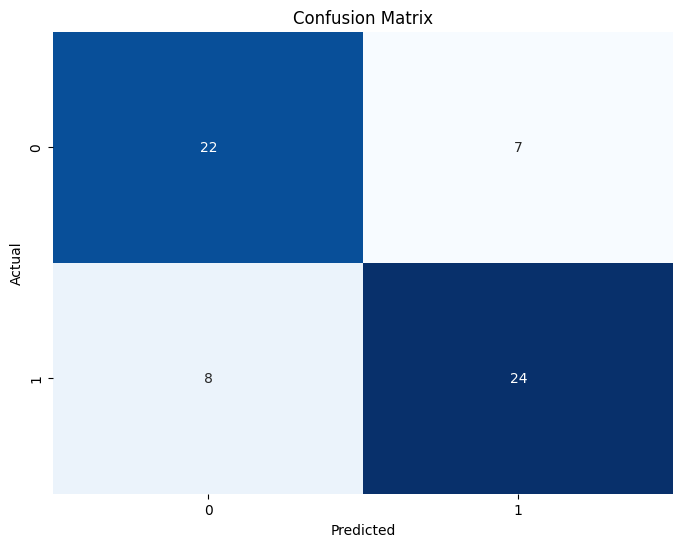

_________________________________________________

Classification Report (gini criterion):

              precision    recall  f1-score   support

           0       0.73      0.76      0.75        29
           1       0.77      0.75      0.76        32

    accuracy                           0.75        61
   macro avg       0.75      0.75      0.75        61
weighted avg       0.75      0.75      0.75        61

_________________________________________________



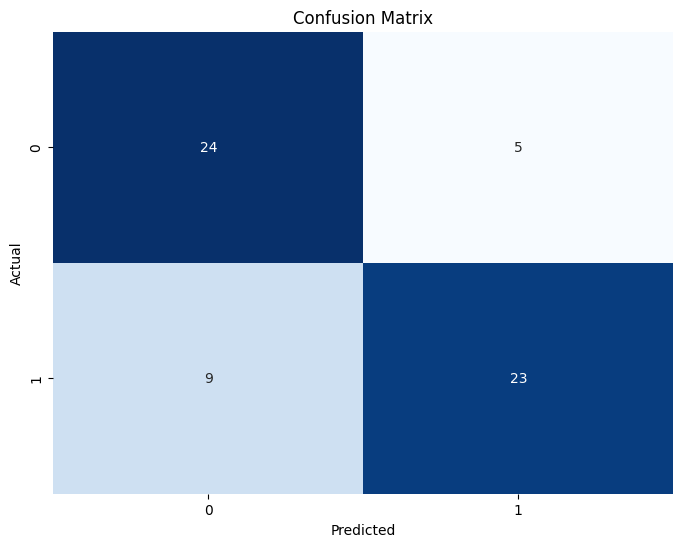

_________________________________________________

Classification Report (entropy criterion):

              precision    recall  f1-score   support

           0       0.73      0.83      0.77        29
           1       0.82      0.72      0.77        32

    accuracy                           0.77        61
   macro avg       0.77      0.77      0.77        61
weighted avg       0.78      0.77      0.77        61

_________________________________________________



In [127]:
from sklearn.tree import DecisionTreeClassifier

def custom_classifier(criteria, X_train, y_train, X_test, y_test):
    dt_clf = DecisionTreeClassifier(criterion=criteria)
    dt_clf.fit(X_train, y_train)
    y_pred = dt_clf.predict(X_test)
    report = classification_report(y_test, y_pred)

    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

    print("_________________________________________________\n")
    print(f"Classification Report ({criteria} criterion):\n")
    print(report)
    print("_________________________________________________\n")
    return dt_clf

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Make sure you have X and y defined

gini_dt = custom_classifier("gini", X_train, y_train, X_test, y_test)
entropy_dt = custom_classifier("entropy", X_train, y_train, X_test, y_test)

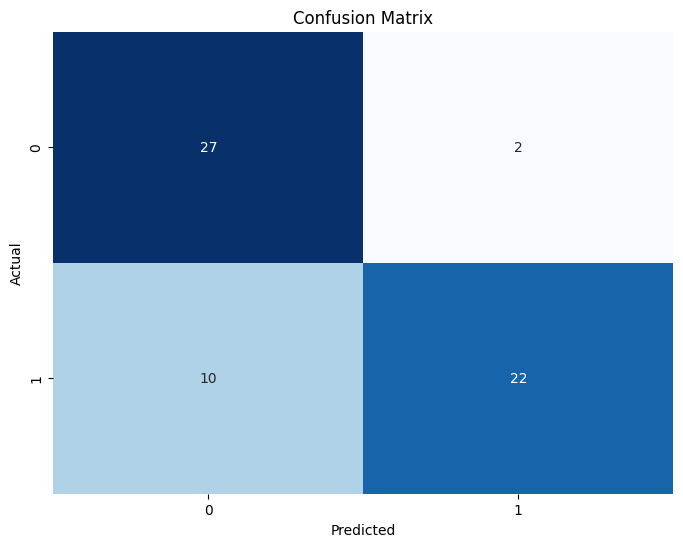

_________________________________________________

Classification Report :

              precision    recall  f1-score   support

           0       0.73      0.93      0.82        29
           1       0.92      0.69      0.79        32

    accuracy                           0.80        61
   macro avg       0.82      0.81      0.80        61
weighted avg       0.83      0.80      0.80        61

_________________________________________________

Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 15, 'random_state': 42, 'splitter': 'random'}


In [126]:
def grid_search_decision_tree(X_train, y_train, X_test, y_test, param_grid):
    entropy_dt = DecisionTreeClassifier(criterion='entropy')
    grid_search = GridSearchCV(entropy_dt, param_grid, cv=10, scoring='accuracy')
    grid_search.fit(X_train, y_train)

    best_params = grid_search.best_params_

    y_pred = grid_search.predict(X_test)
    report = classification_report(y_test, y_pred)

    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

    print("_________________________________________________\n")
    print(f"Classification Report :\n")
    print(report)
    print("_________________________________________________\n")
    print("Best Parameters:", best_params)

param_grid = {
    'criterion': ['entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 3, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 8],
    'max_features': ['sqrt', 'log2'],
    'random_state': [42],
}
grid_search_decision_tree(X_train, y_train, X_test, y_test, param_grid)

### Random Forest

In [124]:
from sklearn.ensemble import RandomForestClassifier

def grid_search_random_forest(X_train, y_train, X_test, y_test, param_grid):
    rf_classifier = RandomForestClassifier()
    grid_search = GridearchCV(rf_classifier, param_grid, cv=10, scoring='accuracy')
    grid_search.fit(X_train, y_train)

    best_params = grid_search.best_params_

    y_pred = grid_search.predict(X_test)
    report = classification_report(y_test, y_pred)

    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

    print("_________________________________________________\n")
    print("Classification Report:\n")
    print(report)
    print("_________________________________________________\n")
    print("Best Parameters:", best_params)


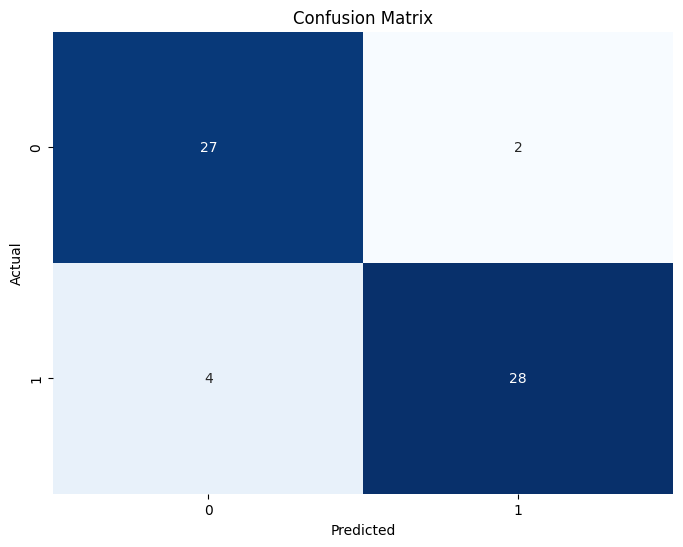

_________________________________________________

Classification Report:

              precision    recall  f1-score   support

           0       0.87      0.93      0.90        29
           1       0.93      0.88      0.90        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61

_________________________________________________

Best Parameters: {'n_estimators': 500, 'min_samples_split': 17, 'max_depth': 5}


In [125]:
param_grid = {
    'n_estimators': [10,50,100,300,500,800,1000],
    'min_samples_split': [5,10,17,37],
    'max_depth': [5,10,17,37],
    }
grid_search_random_forest(X_train, y_train.values.ravel(), X_test, y_test.values.ravel(), param_grid)